# Homework 1 : CUAHSI VU : Snow Hydrology

We'll use the setup from the `homework_1_C_setup.ipynb` notebook for this exercise as well. If you think that you comprised that setup in the previous exercise, just rerun `homework_1_C_setup.ipynb` before continuing.

As before, remember that you want to save your notebooks in a place other than the `examples` directory tree, because files you save there will be deleted and overwritten the next time you start your virtual machine. Save your files somewhere in the `work` directory tree: `work/homework_1` would be a great place for them. So click on "_File --> Save Notebook As..._" and save this notebook as `work/homework_1/homework_1_F_exercise_3.ipynb` before you continue. If things go hopelessly wrong, you can always start over again with the original notebook in your `examples` directory tree.

## F. Homework 1 Exercise 3

### Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt # if you want to do some plotting using matplotlib (optional)
from pysumma.Simulation import Simulation # create Simulation objects
from pysumma.hydroshare import hydroshare # create hydroshare objects to upload to HydroShare
from pysumma.LocalParamInfo import LocalParamInfo # modify local parameters. Explained below

In [2]:
resource_id = '363296896e9d48d9b464d766fcd3073a'
case_path = '/home/jovyan/work/{}/{}/data/contents/reynolds'.format(resource_id, resource_id)
filemanager_path = case_path+'/settings/snow_fileManager_template.txt'
summa_code_path = '/opt/summa'

### Modify the drainage rate through the snow pack

In this exercise we will modify the drainage rate through the snow pack. We will only modify model parameters rather than model options. The model parameters that we will change are:

* `Fcapil` - capillary retention as a fraction of the total pore volume ($-$)
* `k_snow` - hydraulic conductivity of snow ($m\,s^{-1}$)
* `mw_exp` - exponent for meltwater flow ($-$)

You should examine the following five scenarios. 

***
### Default
* Use the default setup (same as in exercises 1 and 2)
```
Fcapil                    |       0.0600 |       0.0100 |       0.1000
k_snow                    |       0.0150 |       0.0050 |       0.0500
mw_exp                    |       3.0000 |       1.0000 |       5.0000
```

In [3]:
# Create simulation object
S = Simulation(case_data=filemanager_path, summa_code=summa_code_path)

# Get parameter file
local_params_file = S.file_dir + '/' + S.local_par.filename
local_params = LocalParamInfo(local_params_file)

# Using default parameters
#local_params.replace('Fcapil', 0.0600, 0.0100, 0.1000)
#local_params.replace('k_snow', 0.0150, 0.0050, 0.0500)
#local_params.replace('mw_exp', 3.0000, 1.0000, 5.0000)

# Run the simulation
ds_drainage_default, file_drainage_default = S.execute(run_suffix='drainage_default', run_option='local')

ModelOuput master file filepath: /opt/summa/build/source/dshare/var_lookup.f90
file_suffix is 'drainage_default'.
file_master is '/home/jovyan/work/363296896e9d48d9b464d766fcd3073a/363296896e9d48d9b464d766fcd3073a/data/contents/reynolds/settings/snow_fileManager_template.txt'.
start at 01:45:17
Name of Model Output control file: /home/jovyan/work/363296896e9d48d9b464d766fcd3073a/363296896e9d48d9b464d766fcd3073a/data/contents/reynolds/settings/snow_zOutputControl.txt
decisions file =  /home/jovyan/work/363296896e9d48d9b464d766fcd3073a/363296896e9d48d9b464d766fcd3073a/data/contents/reynolds/settings/snow_zDecisions.txt
   1 simulStart: 1999-07-01 00:00
   2 simulFinsh: 2003-09-30 23:00
   3 soilCatTbl: ROSETTA
   4 vegeParTbl: USGS
   5 soilStress: NoahType
   6 stomResist: BallBerry
   7 num_method: itertive
   8 fDerivMeth: analytic
   9 LAI_method: monTable
  10 f_Richards: mixdform
  11 groundwatr: noXplict
  12 hc_profile: constant
  13 bcUpprTdyn: nrg_flux
  14 bcLowrTdyn: zeroFlux

***
### Fcapil = 0.02
* Reduce the capillary retention by a factor of three
```
Fcapil                    |       0.0200 |       0.0100 |       0.1000
k_snow                    |       0.0150 |       0.0050 |       0.0500
mw_exp                    |       3.0000 |       1.0000 |       5.0000
```

In [4]:
# Create simulation object
S = Simulation(case_data=filemanager_path, summa_code=summa_code_path)

# Get parameter file
local_params_file = S.file_dir + '/' + S.local_par.filename
local_params = LocalParamInfo(local_params_file)

# Change Fcapil
local_params.replace('Fcapil', 0.0200, 0.0100, 0.1000)
local_params.replace('k_snow', 0.0150, 0.0050, 0.0500)
local_params.replace('mw_exp', 3.0000, 1.0000, 5.0000)

# Run the simulation
ds_drainage_fcapil, file_drainage_fcapil = S.execute(run_suffix='drainage_fcapil', run_option='local')

ModelOuput master file filepath: /opt/summa/build/source/dshare/var_lookup.f90
file_suffix is 'drainage_fcapil'.
file_master is '/home/jovyan/work/363296896e9d48d9b464d766fcd3073a/363296896e9d48d9b464d766fcd3073a/data/contents/reynolds/settings/snow_fileManager_template.txt'.
start at 01:46:09
Name of Model Output control file: /home/jovyan/work/363296896e9d48d9b464d766fcd3073a/363296896e9d48d9b464d766fcd3073a/data/contents/reynolds/settings/snow_zOutputControl.txt
decisions file =  /home/jovyan/work/363296896e9d48d9b464d766fcd3073a/363296896e9d48d9b464d766fcd3073a/data/contents/reynolds/settings/snow_zDecisions.txt
   1 simulStart: 1999-07-01 00:00
   2 simulFinsh: 2003-09-30 23:00
   3 soilCatTbl: ROSETTA
   4 vegeParTbl: USGS
   5 soilStress: NoahType
   6 stomResist: BallBerry
   7 num_method: itertive
   8 fDerivMeth: analytic
   9 LAI_method: monTable
  10 f_Richards: mixdform
  11 groundwatr: noXplict
  12 hc_profile: constant
  13 bcUpprTdyn: nrg_flux
  14 bcLowrTdyn: zeroFlux


***
### k_snow = 0.03
* Double the hydraulic conductivity of snow
```
Fcapil                    |       0.0600 |       0.0100 |       0.1000
k_snow                    |       0.0300 |       0.0050 |       0.0500
mw_exp                    |       3.0000 |       1.0000 |       5.0000
```

In [5]:
# Create simulation object
S = Simulation(case_data=filemanager_path, summa_code=summa_code_path)

# Get parameter file
local_params_file = S.file_dir + '/' + S.local_par.filename
local_params = LocalParamInfo(local_params_file)

# Change k_snow
local_params.replace('Fcapil', 0.0600, 0.0100, 0.1000)
local_params.replace('k_snow', 0.0300, 0.0050, 0.0500)
local_params.replace('mw_exp', 3.0000, 1.0000, 5.0000)

# Run the simulation
ds_drainage_ksnow, file_drainage_ksnow = S.execute(run_suffix='drainage_ksnow', run_option='local')

ModelOuput master file filepath: /opt/summa/build/source/dshare/var_lookup.f90
file_suffix is 'drainage_ksnow'.
file_master is '/home/jovyan/work/363296896e9d48d9b464d766fcd3073a/363296896e9d48d9b464d766fcd3073a/data/contents/reynolds/settings/snow_fileManager_template.txt'.
start at 01:47:00
Name of Model Output control file: /home/jovyan/work/363296896e9d48d9b464d766fcd3073a/363296896e9d48d9b464d766fcd3073a/data/contents/reynolds/settings/snow_zOutputControl.txt
decisions file =  /home/jovyan/work/363296896e9d48d9b464d766fcd3073a/363296896e9d48d9b464d766fcd3073a/data/contents/reynolds/settings/snow_zDecisions.txt
   1 simulStart: 1999-07-01 00:00
   2 simulFinsh: 2003-09-30 23:00
   3 soilCatTbl: ROSETTA
   4 vegeParTbl: USGS
   5 soilStress: NoahType
   6 stomResist: BallBerry
   7 num_method: itertive
   8 fDerivMeth: analytic
   9 LAI_method: monTable
  10 f_Richards: mixdform
  11 groundwatr: noXplict
  12 hc_profile: constant
  13 bcUpprTdyn: nrg_flux
  14 bcLowrTdyn: zeroFlux
 

***
### mw_exp = 1.0
* Set mw_exp to 1.0 (exponent of melt water flow)
```
Fcapil                    |       0.0600 |       0.0100 |       0.1000
k_snow                    |       0.0150 |       0.0050 |       0.0500
mw_exp                    |       1.0000 |       1.0000 |       5.0000
```

In [6]:
# Create simulation object
S = Simulation(case_data=filemanager_path, summa_code=summa_code_path)

# Get parameter file
local_params_file = S.file_dir + '/' + S.local_par.filename
local_params = LocalParamInfo(local_params_file)

# Change mw_exp
local_params.replace('Fcapil', 0.0600, 0.0100, 0.1000)
local_params.replace('k_snow', 0.0150, 0.0050, 0.0500)
local_params.replace('mw_exp', 1.0000, 1.0000, 5.0000)

# Run the simulation
ds_drainage_mwexp, file_drainage_mwexp= S.execute(run_suffix='drainage_mwexp', run_option='local')

ModelOuput master file filepath: /opt/summa/build/source/dshare/var_lookup.f90
file_suffix is 'drainage_mwexp'.
file_master is '/home/jovyan/work/363296896e9d48d9b464d766fcd3073a/363296896e9d48d9b464d766fcd3073a/data/contents/reynolds/settings/snow_fileManager_template.txt'.
start at 01:49:45
Name of Model Output control file: /home/jovyan/work/363296896e9d48d9b464d766fcd3073a/363296896e9d48d9b464d766fcd3073a/data/contents/reynolds/settings/snow_zOutputControl.txt
decisions file =  /home/jovyan/work/363296896e9d48d9b464d766fcd3073a/363296896e9d48d9b464d766fcd3073a/data/contents/reynolds/settings/snow_zDecisions.txt
   1 simulStart: 1999-07-01 00:00
   2 simulFinsh: 2003-09-30 23:00
   3 soilCatTbl: ROSETTA
   4 vegeParTbl: USGS
   5 soilStress: NoahType
   6 stomResist: BallBerry
   7 num_method: itertive
   8 fDerivMeth: analytic
   9 LAI_method: monTable
  10 f_Richards: mixdform
  11 groundwatr: noXplict
  12 hc_profile: constant
  13 bcUpprTdyn: nrg_flux
  14 bcLowrTdyn: zeroFlux
 

***
## Fcapil = 0.02, k_snow = 0.03, mw_exp = 1.0
* Combine all previous changes
```
Fcapil                    |       0.0200 |       0.0100 |       0.1000
k_snow                    |       0.0300 |       0.0050 |       0.0500
mw_exp                    |       1.0000 |       1.0000 |       5.0000
```

In [8]:
# Create simulation object
S = Simulation(case_data=filemanager_path, summa_code=summa_code_path)

# Get parameter file
local_params_file = S.file_dir + '/' + S.local_par.filename
local_params = LocalParamInfo(local_params_file)

# Change Fcapil, k_snow, and mw_exp
local_params.replace('Fcapil', 0.0200, 0.0100, 0.1000)
local_params.replace('k_snow', 0.0300, 0.0050, 0.0500)
local_params.replace('mw_exp', 1.0000, 1.0000, 5.0000)

# Run the simulation
ds_drainage_changeAll, file_drainage_changeAll = S.execute(run_suffix='drainage_changeAll', run_option='local')

ModelOuput master file filepath: /opt/summa/build/source/dshare/var_lookup.f90
file_suffix is 'drainage_changeAll'.
file_master is '/home/jovyan/work/363296896e9d48d9b464d766fcd3073a/363296896e9d48d9b464d766fcd3073a/data/contents/reynolds/settings/snow_fileManager_template.txt'.
start at 01:51:15
Name of Model Output control file: /home/jovyan/work/363296896e9d48d9b464d766fcd3073a/363296896e9d48d9b464d766fcd3073a/data/contents/reynolds/settings/snow_zOutputControl.txt
decisions file =  /home/jovyan/work/363296896e9d48d9b464d766fcd3073a/363296896e9d48d9b464d766fcd3073a/data/contents/reynolds/settings/snow_zDecisions.txt
   1 simulStart: 1999-07-01 00:00
   2 simulFinsh: 2003-09-30 23:00
   3 soilCatTbl: ROSETTA
   4 vegeParTbl: USGS
   5 soilStress: NoahType
   6 stomResist: BallBerry
   7 num_method: itertive
   8 fDerivMeth: analytic
   9 LAI_method: monTable
  10 f_Richards: mixdform
  11 groundwatr: noXplict
  12 hc_profile: constant
  13 bcUpprTdyn: nrg_flux
  14 bcLowrTdyn: zeroFl

***
## On to the next step

Before you go on reset the parameters to
```
Fcapil                    |       0.0600 |       0.0100 |       0.1000
k_snow                    |       0.0150 |       0.0050 |       0.0500
mw_exp                    |       3.0000 |       1.0000 |       5.0000
```


In [9]:
# Get parameter file
local_params_file = S.file_dir + '/' + S.local_par.filename
local_params = LocalParamInfo(local_params_file)

# Using default parameters
local_params.replace('Fcapil', 0.0600, 0.0100, 0.1000)
local_params.replace('k_snow', 0.0150, 0.0050, 0.0500)
local_params.replace('mw_exp', 3.0000, 1.0000, 5.0000)


That's it for the third part of the first homework as far as the model simulations go. Prof. Lundquist will talk more about the analysis that you need to do on these simulations. You can do the analysis here in this notebook if python is your analysis software of choice or you can upload your output to HydroShare (in NetCDF or csv format) to do additional analysis.

Save this notebook and close the tab. You can also right-click on the file in the left panel if it has a green dot next to it and select "_Shutdown kernel_" from the popup menu to stop the python session that is executing the commands in this notebook. You are now done with all the model simulations for the first homework. 

On to model analysis! (there is no notebook for that)

***
***
## Analysis:

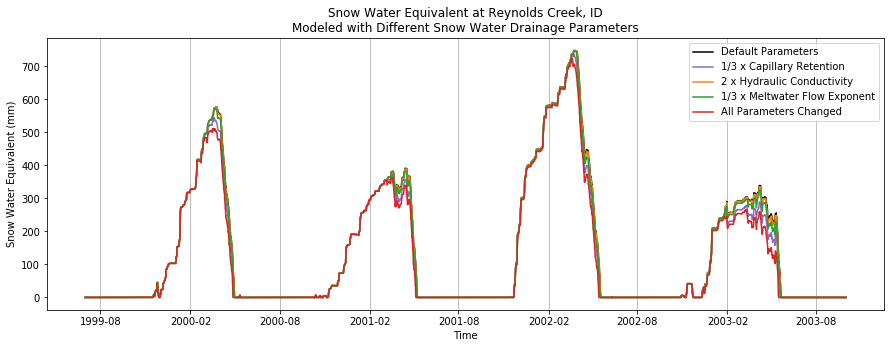

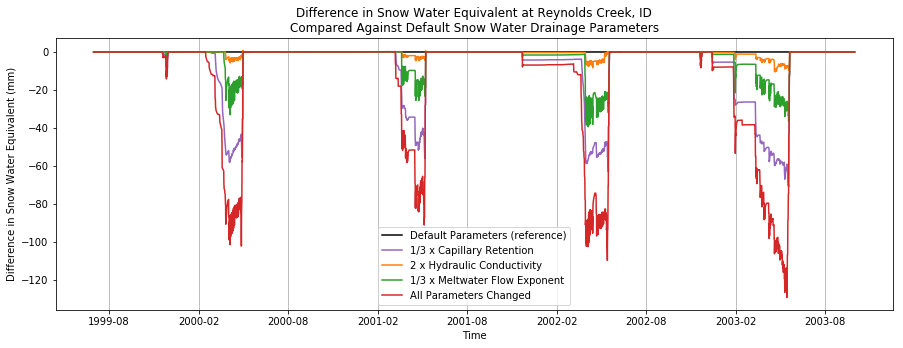

In [9]:
# Retrieve SWE from each model scenario:
default_SWE = ds_drainage_default.scalarSWE.isel(hru=0)
fcapil_SWE = ds_drainage_fcapil.scalarSWE.isel(hru=0)
ksnow_SWE = ds_drainage_ksnow.scalarSWE.isel(hru=0)
mwexp_SWE = ds_drainage_mwexp.scalarSWE.isel(hru=0)
changeAll_SWE = ds_drainage_changeAll.scalarSWE.isel(hru=0)

# scalarSWE in kg m-2 and for nominal water density of 1000 kg m-3:
# SWE (kg m-2) / 1000 (kg m-3) * 1000 (mm/m) = SWE (mm)


# Plot SWE over time:
plt.figure(figsize=(15,5))
plt.title("Snow Water Equivalent at Reynolds Creek, ID\nModeled with Different Snow Water Drainage Parameters")
plt.plot(default_SWE.time,default_SWE,'-k',label="Default Parameters")
plt.plot(fcapil_SWE.time,fcapil_SWE,'tab:purple',label="1/3 x Capillary Retention")
plt.plot(ksnow_SWE.time,ksnow_SWE,'tab:orange',label="2 x Hydraulic Conductivity")
plt.plot(mwexp_SWE.time,mwexp_SWE,'tab:green',label="1/3 x Meltwater Flow Exponent")
plt.plot(changeAll_SWE.time,changeAll_SWE,'tab:red',label="All Parameters Changed")
ax = plt.gca(); ax.xaxis.grid(True)
plt.legend()
plt.xlabel("Time");
plt.ylabel("Snow Water Equivalent (mm)");

# Plot deltaSWE over time:
plt.figure(figsize=(15,5))
plt.title("Difference in Snow Water Equivalent at Reynolds Creek, ID\nCompared Against Default Snow Water Drainage Parameters")
plt.plot(default_SWE.time,default_SWE-default_SWE,'-k',label="Default Parameters (reference)")
plt.plot(fcapil_SWE.time,fcapil_SWE-default_SWE,'tab:purple',label="1/3 x Capillary Retention")
plt.plot(ksnow_SWE.time,ksnow_SWE-default_SWE,'tab:orange',label="2 x Hydraulic Conductivity")
plt.plot(mwexp_SWE.time,mwexp_SWE-default_SWE,'tab:green',label="1/3 x Meltwater Flow Exponent")
plt.plot(changeAll_SWE.time,changeAll_SWE-default_SWE,'tab:red',label="All Parameters Changed")
ax = plt.gca(); ax.xaxis.grid(True)
plt.legend()
plt.xlabel("Time");
plt.ylabel("Difference in Snow Water Equivalent (mm)");

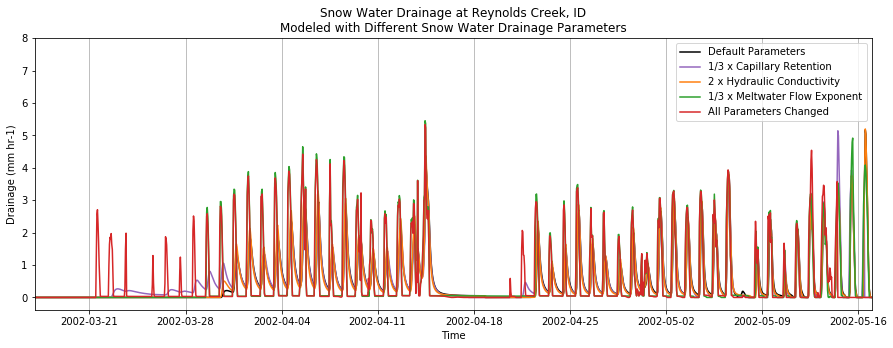

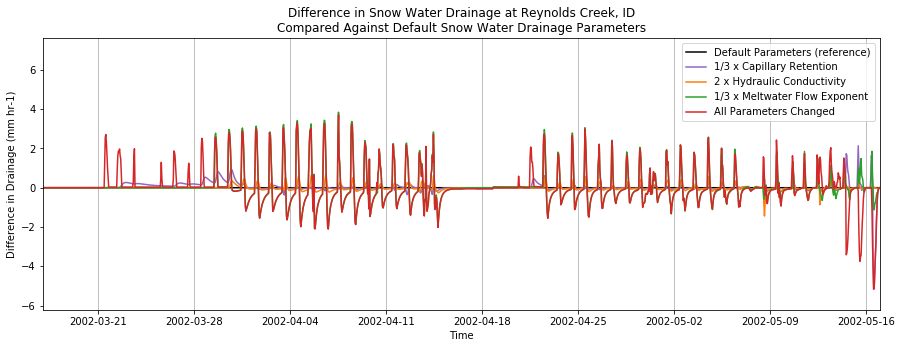

In [14]:
# Retrieve drainage from bottom of snow pack (m) from each model scenario, convert to mm/hr:
default_drainage = ds_drainage_default.scalarSnowDrainage.isel(hru=0)*1000*3600
fcapil_drainage = ds_drainage_fcapil.scalarSnowDrainage.isel(hru=0)*1000*3600
ksnow_drainage = ds_drainage_ksnow.scalarSnowDrainage.isel(hru=0)*1000*3600
mwexp_drainage = ds_drainage_mwexp.scalarSnowDrainage.isel(hru=0)*1000*3600
changeAll_drainage = ds_drainage_changeAll.scalarSnowDrainage.isel(hru=0)*1000*3600

# Set start and end indices for plotting different time periods
#start = 0; end = len(default_drainage.time.data)-1 # entire time period
#start = 6250; end = 6550; # early melt - March, 2000
#start = 6700; end = 6800; # middle melt - April, 2000
#start = 7200; end = 7400; # late melt - May, 2000
start = '2002-03-17T00:00:00'; end = '2002-05-17T00:00:00' # March 17 - May 17, 2002

# Plot snow water drainage over time:
plt.figure(figsize=(15,5))
plt.title("Snow Water Drainage at Reynolds Creek, ID\nModeled with Different Snow Water Drainage Parameters")
plt.plot(default_drainage.time,default_drainage,'-k',label="Default Parameters")
plt.plot(fcapil_drainage.time,fcapil_drainage,'tab:purple',label="1/3 x Capillary Retention")
plt.plot(ksnow_drainage.time,ksnow_drainage,'tab:orange',label="2 x Hydraulic Conductivity")
plt.plot(mwexp_drainage.time,mwexp_drainage,'tab:green',label="1/3 x Meltwater Flow Exponent")
plt.plot(changeAll_drainage.time,changeAll_drainage,'tab:red',label="All Parameters Changed")
ax = plt.gca(); ax.xaxis.grid(True)
plt.legend()
plt.xlabel("Time");
plt.ylabel("Drainage (mm hr-1)");
#plt.xlim(((default_drainage.time.data[start],default_drainage.time.data[end])));
plt.xlim((start,end));

# Plot delta snow water drainage over time:
plt.figure(figsize=(15,5))
plt.title("Difference in Snow Water Drainage at Reynolds Creek, ID\nCompared Against Default Snow Water Drainage Parameters")
plt.plot(default_drainage.time,default_drainage-default_drainage,'-k',label="Default Parameters (reference)")
plt.plot(fcapil_drainage.time,fcapil_drainage-default_drainage,'tab:purple',label="1/3 x Capillary Retention")
plt.plot(ksnow_drainage.time,ksnow_drainage-default_drainage,'tab:orange',label="2 x Hydraulic Conductivity")
plt.plot(mwexp_drainage.time,mwexp_drainage-default_drainage,'tab:green',label="1/3 x Meltwater Flow Exponent")
plt.plot(changeAll_drainage.time,changeAll_drainage-default_drainage,'tab:red',label="All Parameters Changed")
ax = plt.gca(); ax.xaxis.grid(True)
plt.legend()
plt.xlabel("Time");
plt.ylabel("Difference in Drainage (mm hr-1)");
#plt.xlim(((default_drainage.time.data[start],default_drainage.time.data[end])));
plt.xlim((start,end));

In [11]:
default_drainage.time.data[start]

numpy.datetime64('2000-03-17T09:59:59.999986560')